In [1]:
import numpy as np
import matplotlib.pyplot as plt

#import matplotlib.gridspec as gridspec
from matplotlib import ticker
from matplotlib.patches import Rectangle
import copy
import xarray as xr

path = '../../data/RCEMIP_processed/'

ssts = ['295','300','305']
col = ['dodgerblue','orange','crimson']

plt.rcParams.update({'font.size': 18}) #all to 18 if not specified other

variables = ['hr_acre','clear_sky_radiative_heating','cloud_fraction',
             'density','cloud_and_precip_ice_mixing_ratio','ice_mixing_ratio']
units = ['K/day','K/day','K/day','1','kg/m3','kg/kg']

ds1 = xr.open_dataset(path+'RCElarge_z24_merged_1D_averages_multiplevars2.nc')

In [2]:
maxdFdz= np.zeros((18,3))
maxacre= np.zeros((18,3))
maxrho= np.zeros((18,3))
maxgamma= np.zeros((18,3))
maxice= np.zeros((18,3))

r_maxrho = np.zeros((18))
r_maxgamma = np.zeros((18))
r_maxice = np.zeros((18))

r_maxacre = np.zeros((18))
r_maxdFdz = np.zeros((18))

cp = 1005

qrad = ds1['hr_acre'].values
mqrad = (qrad[:,:,:-1]+qrad[:,:,1:])/2.

temp = ds1['temperature'].values
mtemp = (temp[:,:,:-1]+temp[:,:,1:])/2.

rho = ds1['density'].values
mrho = (rho[:,:,:-1]+rho[:,:,1:])/2.

dFdz = mqrad*cp*mrho * 1/86400

ds1['ice_water_content']=ds1['density']*ds1['ice_mixing_ratio']
ice = ds1['ice_water_content'].values
mice = (ice[:,:,:-1]+ice[:,:,1:])/2.

gamma = -np.diff(ds1['temperature'].values)/np.diff(ds1['alt'].values)

mqrad[mtemp>273.15]=np.nan #only in the upper troposphere

for m in range(0,18): #models
    for s in range(0,3): #ssts
        maxacre[m,s] = np.nanmax(mqrad[m,s])
        maxdFdz[m,s] = dFdz[m,s,np.nanargmax(mqrad[m,s])]        
        maxrho[m,s] = mrho[m,s,np.nanargmax(mqrad[m,s])]
        maxgamma[m,s] = gamma[m,s,np.nanargmax(mqrad[m,s])]

        maxice[m,s] = mice[m,s,np.nanargmax(mqrad[m,s])]

    r_maxacre[m] = 1e2*(maxacre[m,2]-maxacre[m,0])/(maxacre[m,0])
    r_maxdFdz[m] = 1e2*(maxdFdz[m,2]-maxdFdz[m,0])/(maxdFdz[m,0])

    r_maxice[m] = 1e2*(maxice[m,2]-maxice[m,0])/(maxice[m,0])
    r_maxgamma[m] = 1e2*(maxgamma[m,2]-maxgamma[m,0])/(maxgamma[m,0])

    r_maxrho[m] = 1e2*(1/maxrho[m,2]-1/maxrho[m,0])/(1/maxrho[m,0])

all RCE_large models here: CRMs, SP-GCMs, GCMs

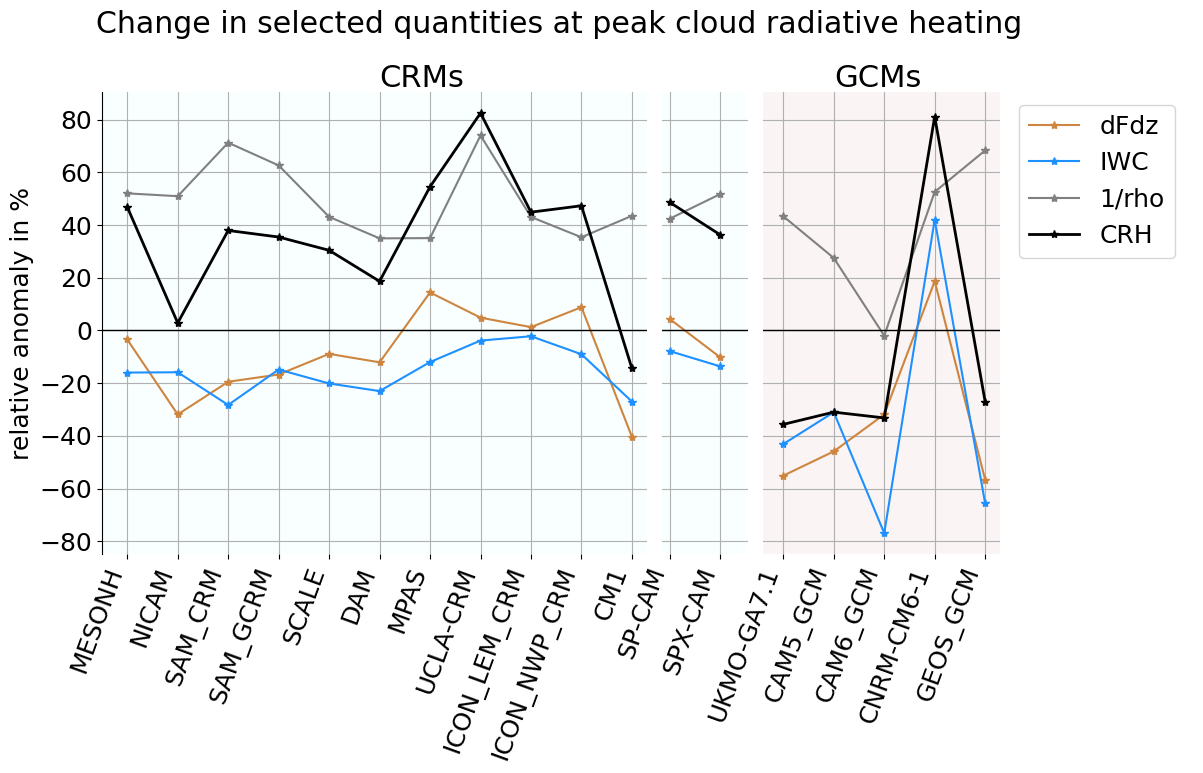

In [4]:
terms = ['dFdz','IWC','1/rho','CRH']

mmm = np.array(['MESONH','NICAM','SAM_CRM','SAM_GCRM','SCALE','DAM','MPAS','UCLA-CRM','CAM5_GCM',
            'CAM6_GCM','CNRM-CM6-1','GEOS_GCM','ICON_LEM_CRM','ICON_NWP_CRM','SP-CAM','SPX-CAM','UKMO-GA7.1','CM1'])
idx = [0,1,2,3,4,5,6,7,12,13,17,14,15,16,8,9,10,11]
models = mmm[idx]

r1_maxdFdz = np.copy(r_maxdFdz)
r1_maxdFdz = r1_maxdFdz[idx]

r1_maxice = np.copy(r_maxice)
r1_maxice = r1_maxice[idx]

r1_maxrho = np.copy(r_maxrho)
r1_maxrho = r1_maxrho[idx]

r1_maxacre = np.copy(r_maxacre)
r1_maxacre = r1_maxacre[idx]

b=[] #for legend

#-----------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(14,6,forward=True)

currentAxis = plt.gca()

b.append(plt.plot(r1_maxdFdz[:11],'peru',marker='*')[0])
b.append(plt.plot(r1_maxice[:11],'dodgerblue',marker='*')[0])
b.append(plt.plot(r1_maxrho[:11],'gray',marker='*')[0])
b.append(plt.plot(r1_maxacre[:11],'k',linewidth=2,marker='*')[0])
#SP
values = [10.75,11.75]
b.append(plt.plot(values,r1_maxdFdz[11:13],'peru',marker='*')[0])
b.append(plt.plot(values,r1_maxice[11:13],'dodgerblue',marker='*')[0])
b.append(plt.plot(values,r1_maxrho[11:13],'gray',marker='*')[0])
b.append(plt.plot(values,r1_maxacre[11:13],'k',linewidth=2,marker='*')[0])
#GCMs
values = [13,14,15,16,17]
b.append(plt.plot(values,r1_maxdFdz[13:],'peru',marker='*')[0])
b.append(plt.plot(values,r1_maxice[13:],'dodgerblue',marker='*')[0])
b.append(plt.plot(values,r1_maxrho[13:],'gray',marker='*')[0])
b.append(plt.plot(values,r1_maxacre[13:],'k',linewidth=2,marker='*')[0])

plt.axhline(y = 0, color = 'k',linewidth=1)

plt.ylabel('relative anomaly in %')


x = np.arange(0,11)
x = np.concatenate((x,[10.75,11.75,13,14,15,16,17]),axis=0)
plt.xticks(x, models, rotation=70,ha='right')
plt.legend(b,terms)
plt.xlim(-0.5,21)

currentAxis.add_patch(Rectangle((12.5, -95), 5, 220,
                      alpha=0.05, facecolor='brown'))
currentAxis.add_patch(Rectangle((-0.5, -95), 12.75, 220,
                      alpha=0.35, facecolor='azure'))

plt.title('Change in selected quantities at peak cloud radiative heating                  ',y=1.11)

plt.text(5,101,'CRMs',horizontalalignment='left',
verticalalignment='top',fontsize=22,color='black')

plt.text(14,101,'GCMs',horizontalalignment='left',
verticalalignment='top',fontsize=22,color='black')

plt.axvspan(10.3, 10.6, facecolor='white',alpha=1,zorder=111)
plt.axvspan(12.3, 12.6, facecolor='white',alpha=1,zorder=111)
plt.axvspan(17.3, 26, facecolor='white',alpha=1,zorder=3)
currentAxis.spines['bottom'].set_visible(False)
currentAxis.spines['top'].set_visible(False)
currentAxis.spines['right'].set_visible(False)
plt.grid(True)
#plt.savefig('/path-to-file/Fig5_terms_CRH_formula.pdf',bbox_inches='tight')  